
Simulation ended. Results:
User 0 transmitted 94061 times, total data transmitted: -1728.0 bits, average transmission rate: -0.000 Mbps
Total rate :  18.8119712

Simulation ended. Results:
User 0 transmitted 7841 times, total data transmitted: 94092000 bits, average transmission rate: 1.568 Mbps
User 1 transmitted 7606 times, total data transmitted: 91272000 bits, average transmission rate: 1.521 Mbps
User 2 transmitted 7788 times, total data transmitted: 93456000 bits, average transmission rate: 1.558 Mbps
User 3 transmitted 7783 times, total data transmitted: 93396000 bits, average transmission rate: 1.557 Mbps
User 4 transmitted 8556 times, total data transmitted: 102672000 bits, average transmission rate: 1.711 Mbps
User 5 transmitted 8059 times, total data transmitted: 96708000 bits, average transmission rate: 1.612 Mbps
User 6 transmitted 8442 times, total data transmitted: 101304000 bits, average transmission rate: 1.688 Mbps
User 7 transmitted 8408 times, total data transmitte

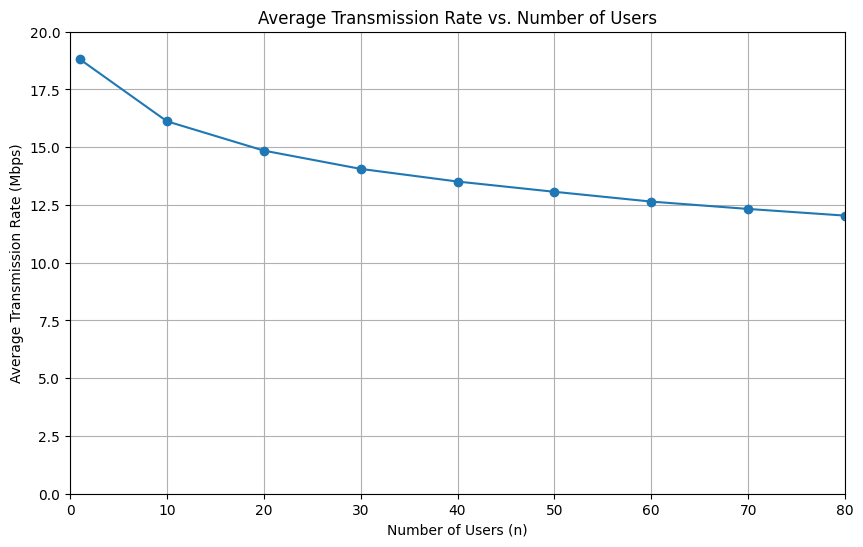

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from main_latest import create_users, simulate_transmission, print_mode  # インポート

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'g'  # Transmission mode
# n_values = range(1, 81, 10)  # n = 1, 10, 20, ..., 80
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]

# 結果を格納
n_list = []
total_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in n_values:
    users = create_users(n)
    total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=print_mode[2], mode=mode)
    average_rate = total_data_transmitted / duration / 10**6  # Mbps
    n_list.append(n)
    total_rates.append(average_rate)

print(n_values)

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)
plt.plot(n_list, total_rates, marker='o', linestyle='-')
plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.show()



Simulation ended. Results:
Total rate :  18.237985600000002

Simulation ended. Results:
Total rate :  15.5237856

Simulation ended. Results:
Total rate :  14.3349964

Simulation ended. Results:
Total rate :  13.6124

Simulation ended. Results:
Total rate :  13.022

Simulation ended. Results:
Total rate :  12.6388

Simulation ended. Results:
Total rate :  12.218

Simulation ended. Results:
Total rate :  11.8935964

Simulation ended. Results:
Total rate :  11.616396400000001
[1, 10, 20, 30, 40, 50, 60, 70, 80]


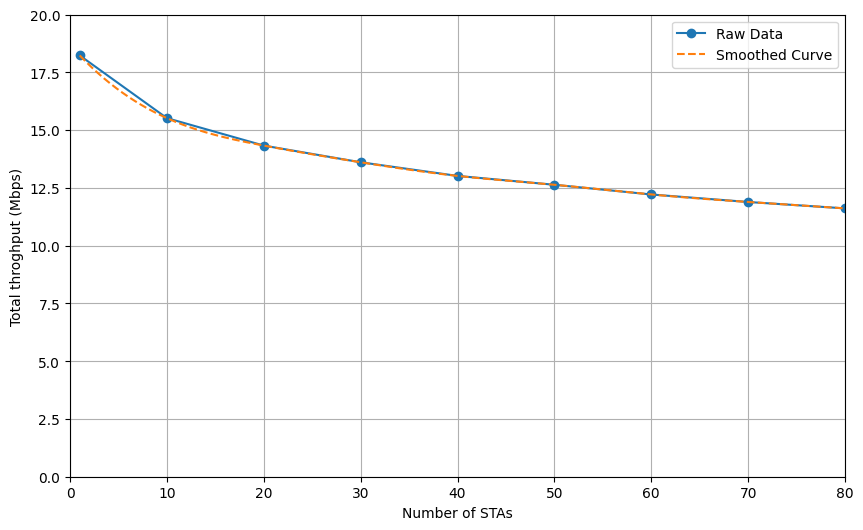

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from main_latest import create_users, simulate_transmission, print_mode  # インポート

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'g'  # Transmission mode
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]

# 結果を格納
n_list = []
total_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in n_values:
    users = create_users(n)
    total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=print_mode[2], mode=mode)
    average_rate = total_data_transmitted / duration / 10**6  # Mbps
    n_list.append(n)
    total_rates.append(average_rate)

print(n_values)

# スムーズな曲線を生成
n_array = np.array(n_list)
rate_array = np.array(total_rates)
n_smooth = np.linspace(n_array.min(), n_array.max(), 500)  # スムーズなnの範囲を生成
smooth_rate = make_interp_spline(n_array, rate_array)(n_smooth)  # 補間を計算

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 元データとスムーズな曲線をプロット
plt.plot(n_list, total_rates, marker='o', linestyle='-', label="Raw Data")
plt.plot(n_smooth, smooth_rate, linestyle='--', label="Smoothed Curve")

# plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of STAs")
plt.ylabel("Total throghput (Mbps)")
plt.grid(True)
plt.legend()
plt.show()



Simulation ended. Results:
Total rate :  18.064778399999998

Simulation ended. Results:
Total rate :  18.0761532

Simulation ended. Results:
Total rate :  18.070774800000002

Simulation ended. Results:
Total rate :  18.0727568

Simulation ended. Results:
Total rate :  18.0722

Simulation ended. Results:
Total rate :  18.069149600000003

Simulation ended. Results:
Total rate :  18.074782

Simulation ended. Results:
Total rate :  18.0779676

Simulation ended. Results:
Total rate :  18.0723676

Simulation ended. Results:
Total rate :  18.072946

Simulation ended. Results:
Total rate :  18.0716

Simulation ended. Results:
Total rate :  18.0641676

Simulation ended. Results:
Total rate :  18.071782

Simulation ended. Results:
Total rate :  18.078

Simulation ended. Results:
Total rate :  18.0737964

Simulation ended. Results:
Total rate :  18.0718

Simulation ended. Results:
Total rate :  18.078767600000003

Simulation ended. Results:
Total rate :  18.068946

Simulation ended. Results:
Tot

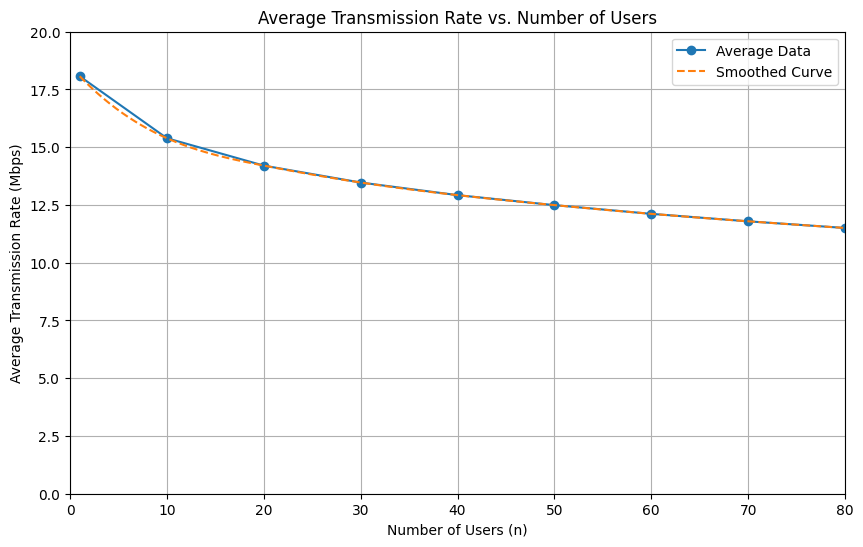

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from main_latest import create_users, simulate_transmission, print_mode  # インポート

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'g'  # Transmission mode
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]
num_simulations = 10  # 各nでのシミュレーション回数

# 結果を格納
n_list = []
average_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in n_values:
    rates = []  # このnでの各シミュレーションの結果を保存
    for _ in range(num_simulations):
        users = create_users(n)
        total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=print_mode[2], mode=mode)
        average_rate = total_data_transmitted / duration / 10**6  # Mbps
        rates.append(average_rate)
    # 平均値を計算
    mean_rate = np.mean(rates)
    n_list.append(n)
    average_rates.append(mean_rate)

print(f"n_values: {n_values}")
print(f"average_rates: {average_rates}")

# スムーズな曲線を生成
n_array = np.array(n_list)
rate_array = np.array(average_rates)
n_smooth = np.linspace(n_array.min(), n_array.max(), 500)  # スムーズなnの範囲を生成
smooth_rate = make_interp_spline(n_array, rate_array)(n_smooth)  # 補間を計算

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 平均値とスムーズな曲線をプロット
plt.plot(n_list, average_rates, marker='o', linestyle='-', label="Average Data")
plt.plot(n_smooth, smooth_rate, linestyle='--', label="Smoothed Curve")

plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.legend()
plt.show()



Simulation ended. Results:
Total rate :  18.072553199999998

Simulation ended. Results:
Total rate :  18.063767600000002

Simulation ended. Results:
Total rate :  18.0753892

Simulation ended. Results:
Total rate :  18.0677676

Simulation ended. Results:
Total rate :  18.072382

Simulation ended. Results:
Total rate :  18.0777496

Simulation ended. Results:
Total rate :  18.0685568

Simulation ended. Results:
Total rate :  18.073746

Simulation ended. Results:
Total rate :  18.069567600000003

Simulation ended. Results:
Total rate :  18.0677712

Simulation ended. Results:
Total rate :  15.4147964

Simulation ended. Results:
Total rate :  15.3917964

Simulation ended. Results:
Total rate :  15.415992800000001

Simulation ended. Results:
Total rate :  15.3868

Simulation ended. Results:
Total rate :  15.3782

Simulation ended. Results:
Total rate :  15.375585599999999

Simulation ended. Results:
Total rate :  15.3716

Simulation ended. Results:
Total rate :  15.3837928

Simulation ended

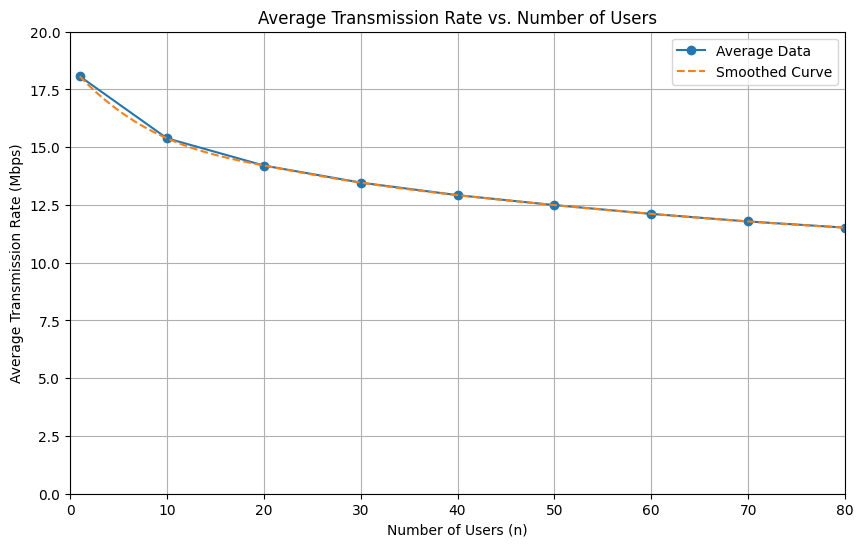

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from main_latest import create_users, simulate_transmission, print_mode  # インポート

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'g'  # Transmission mode
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]
num_simulations = 10  # 各nでのシミュレーション回数
reference_results = [17.5, 14.9, 13.25, 12.6, 12.3, 12.0, 11.25, 10.1]  # 正解値

# 結果を格納
n_list = []
average_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in n_values:
    rates = []  # このnでの各シミュレーションの結果を保存
    for _ in range(num_simulations):
        users = create_users(n)
        total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=print_mode[2], mode=mode)
        average_rate = total_data_transmitted / duration / 10**6  # Mbps
        rates.append(average_rate)
    # 平均値を計算
    mean_rate = np.mean(rates)
    n_list.append(n)
    average_rates.append(mean_rate)

# 正解率を計算
accuracy = [
    (sim_result / ref_result) * 100
    for sim_result, ref_result in zip(average_rates, reference_results)
]

# 正解率を出力
for n, acc in zip(n_values, accuracy):
    print(f"n={n}: Accuracy = {acc:.2f}%")

# スムーズな曲線を生成
n_array = np.array(n_list)
rate_array = np.array(average_rates)
n_smooth = np.linspace(n_array.min(), n_array.max(), 500)  # スムーズなnの範囲を生成
smooth_rate = make_interp_spline(n_array, rate_array)(n_smooth)  # 補間を計算

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 平均値とスムーズな曲線をプロット
plt.plot(n_list, average_rates, marker='o', linestyle='-', label="Average Data")
plt.plot(n_smooth, smooth_rate, linestyle='--', label="Smoothed Curve")

plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.legend()
plt.show()


![img](./Untitled.png)

In [ ]:
[17.5, 14.9, 13.25, 12.6, 12.3, 12.0, 11.25, 11.0]